In [1]:
import datetime as dt
import pandas as pd
import numpy as np

online_path = r"../input/chap-2/online12M.csv"
online = pd.read_csv(online_path)
online = online.iloc[:, 1:]
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


## 1. Data pre-processing
In this chapter we are going to learn about the key data pre-processing steps and considerations. We will then run k-means clustering on our RFM numbers and identify customer segments.
### 1.1. Theory.
#### Advantages of k-means clustering
We are going to use K-means clustering because of its several advantages.
- First, it is **one of the most popular unsupervised learning method**, and has been researched a lot, so you can find answers and tips on almost any question about it. 
- Also, it is **a pretty fast algorithm** compared to slower ones that do not work very well with large datasets - especially not on your local machine. 
- And finally, it **does its job well**, **as long as** your `assumptions` about the data are **correct**. 

We will review them in this lesson, and then learn how to pre-process your data to get the most out of k-means.

#### Key k-means assumptions
Although this is not an exhaustive list, these are the make-it-or-break-it assumptions that are absolutely critical to address before the clustering. 
- The first assumption is that all variables have **symmetrical distributions**. By definition, this means the distribution is **not skewed**. We will see examples of both skewed and non skewed distributions in the next slide. 
- The second assumption is that all variables have the **same average values**. This is key to ensuring that each metric gets an equal weight in the k-means calculation. You will learn how to get every variable to the same mean. 
- And finally, we will have to **scale the variance of each variable to the same levels**. Same as with the averages, it helps the algorithm to converge and ensures equal importance is assigned to each variable.

#### Skewed variables
Let's take a look at how to identify skewed variables. The best way to identify them is by looking at each variable's distribution - the skewness will show up as a curve with a tail. 

- For example this is a left-skewed distribution with a tail on the left. And this here is a right-skewed distribution. While there are mathematical ways to identify skewness, the visual analysis is somewhat more accessible. It allows you to not only identify skewness, but also understand the distribution and the spread of data.

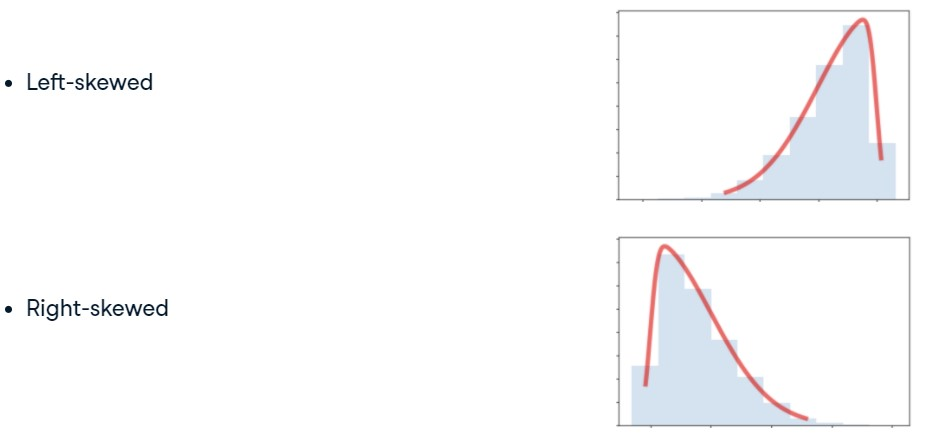

In [2]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

Skewness is best managed by applying a **logarithmic transformation** to each of the skewed variables. Its distribution then becomes more symmetrical. One thing to point out though - log transformation works only on positive values. 

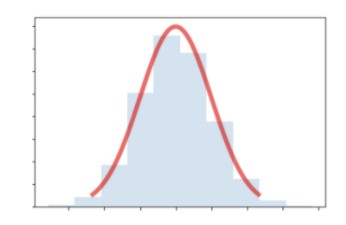

In [3]:
## Hình minh họa Image(fig1, height, width)

Fortunately, this is mostly the case with customer behavior or purchasing patterns. You will learn about alternative options to manage variables with negative values in the next lesson.

#### Variables on the same scale
Finally, K-means assumes each variable has equal average value, and equal variance. 
- We will use recency, frequency, and monetary values for the clustering and in the next lesson you will see that they don't meet any of the criteria.

- We will then have to go through necessary pre-processing steps before anything else. 

In [4]:
online['Total_Sum'] = online['Quantity'] * online['UnitPrice']
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days = 1)
data_mart = online.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                                'InvoiceNo': 'count',
                                                'Total_Sum': 'sum'
                                               })

data_mart = data_mart.rename(columns = {'InvoiceDate': 'Recency',
                                        'InvoiceNo' : 'Frequency',
                                        'Total_Sum' : 'Monetary_Value'
                                     },
                             inplace = False
                            )

- By calling the `"describe"` function on a dataframe you will get a list of key statistics. Here we see that both the average values as well as standard deviations are different between the three variables.

In [5]:
data_mart.describe()

,Recency,Frequency,Monetary_Value
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


### 1.2. PRACTICES
#### Exercise 1.2.1. Assumptions of k-means
You've seen in the video that k-means works well as long as the data meets certain criteria.

Which one of these is not an assumption of k-means?

>- A. Equal average values of variables
>- B. Equal standard deviation of variables
>- C. Non-symmetrical distribution of variables
>- D. Symmetrical distribution of variables

#### Answers.
Look back the theory; K-means works better with symmetrically distributed variables! Hence **C** is correct option!!

#### Exercise 1.2.2. Calculate statistics of variables
We have created a pandas DataFrame called data for you with three variables: var1, var2 and var3.


In [6]:
data = pd.DataFrame({'var1': v1, 'var2': v2, 'var3': v3})
data.head()

,var1,var2,var3
0,137,1.840,2.898
1,335,0.910,0.687
2,172,4.104,8.326
3,355,6.661,1.582
4,303,15.285,110.750


You will now calculate average and standard deviation values for the variables, and also print key statistics of the dataset.

You can use the console to explore the dataset.
#### SOLUTION.

In [7]:
# Print the average values of the variables in the dataset
print(data.mean())

# Print the standard deviation of the variables in the dataset
print(data.std())

# Get the key statistics of the dataset
print(data.describe())

var1    251.85000
var2      1.92559
var3     12.55028
dtype: float64
var1    90.993104
var2     2.583730
var3    34.516362
dtype: float64
             var1       var2        var3
count  100.000000  100.00000  100.000000
mean   251.850000    1.92559   12.550280
std     90.993104    2.58373   34.516362
min    101.000000    0.04800    0.002000
25%    171.750000    0.61250    0.280750
50%    250.000000    1.17550    1.260500
75%    339.250000    2.20800    5.568000
max    397.000000   15.31200  228.779000


**Comments** You can see that the averages and standard deviations are different across the variables.

## 2. Managing skewed variables
Good job! Now we will dive deep into techniques to manage skewed variables.
### 2.1. Theory
#### Identifying skewness
In the previous lesson, we discussed that the easiest way to identify skewness is by visually analyzing the distribution of each variable. And if we see something like this - it means the data is skewed.

#### Exploring distribution of recency
Let's explore the distribution of our recency variable. 
- We will first import the seaborn library and the pyplot module from matplotlib. 
- Then we will use `distplot() / histplot` on the Recency variable to plot its distribution. 

As you can see, the Recency metric has a tail on the right, so we can conclude that it is skewed. 

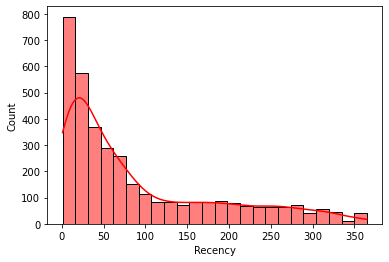

In [8]:
import seaborn as sns
sns.histplot(data_mart['Recency'], kde = True, color = 'red');

Let's try the same thing on the Frequency.

#### Exploring distribution of frequency
We already have the libraries imported so we'll just plot the distribution for frequency directly. Frequency has an even worse skewness - the tail is again on the right side, but the majority of observations are between zero and roughly one hundred, while there are values spreading up to fourteen hundred. 

Let's see if we can deal with the skewness and make it more symmetrical.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


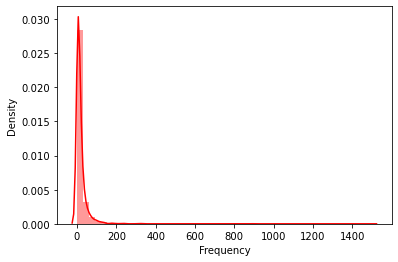

In [9]:
sns.distplot(data_mart['Frequency'], kde = True, color = 'red');

#### Data transformations to manage skewness
The easiest way to unskew the data is applying a logarithmic transformation, but this only works on positive values. There are other approaches like a Box-Cox transformation, but we will use the simpler version for this example. 
- We first apply the `numpy.log() function` on the frequency variable. We store it as `frequency_log`. 

In [10]:
frequency_log = np.log(data_mart['Frequency'])

- Then, we plot it like in the previous slides. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


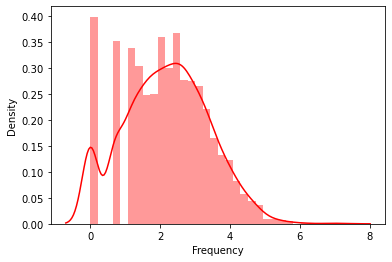

In [11]:
sns.distplot(frequency_log, kde = True, color = 'red');

There we go! Although it's not perfectly symmetrical, it has very little skewness compared to the original distribution.

#### Dealing with negative values
As pointed out earlier, one important thing to remember about logarithmic transformation is that it only works on **positive values**. Although customer behavioral or purchase data is almost always positive, there are some techniques to manage negative values. The simplest way to manage negative values is to add a constant value to each variable. 
- The choice of value is arbitrary but the best practice is to **add the absolute value of the lowest negative** value to each observation, and then a small constant like 1, to force the variables to be strictly positive. 
- Another option is to choose a **different transformation method**. Calculating a **cube root** works quite well in some cases. While these are useful tips, the fortunate thing with dealing with customer behavior data is that it almost always positive, so we don't have to worry about this.

### 2.2. PRACTICES
#### Exercise 2.2.1. Detect skewed variables
We have created a dataset called data for you with three variables: var1, var2 and var3. You will now explore their distributions.

The plt.subplot(...) call before the seaborn function call allows you to plot several subplots in one chart, you do not have to change it.

In [12]:
import matplotlib.pyplot as plt

Libraries [seaborn]() and [matplotlib.pyplot]() have been loaded as sns and plt respectively. Feel free to explore the dataset in the console.
#### SOLUTION

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

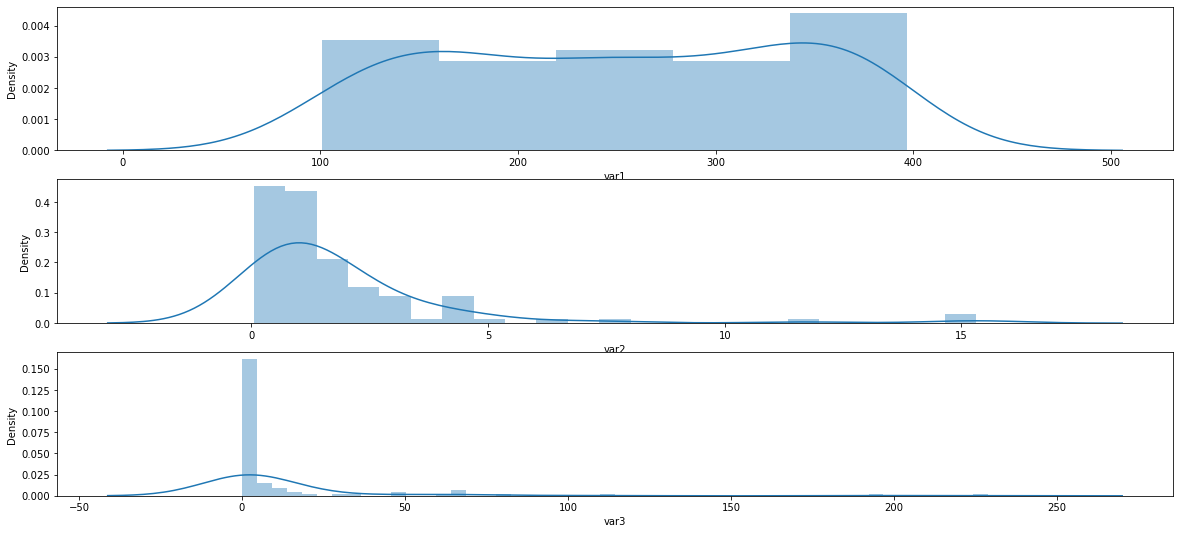

In [13]:
plt.figure(figsize = (20, 9))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['var1'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['var2'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['var3'])
# Show the plot
plt.show()

#### Exercise 3.2.2. Manage skewness
We've loaded the same dataset named data. Now your goal will be to remove skewness from var2 and var3 as they had a non-symmetric distribution as you've seen in the previous exercise plot. You will visualize them to make sure the problem is solved!

Libraries pandas, numpy, seaborn and matplotlib.pyplot have been loaded as pd, np, sns and plt respectively. Feel free to explore the dataset in the console.
#### SOLUTION.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


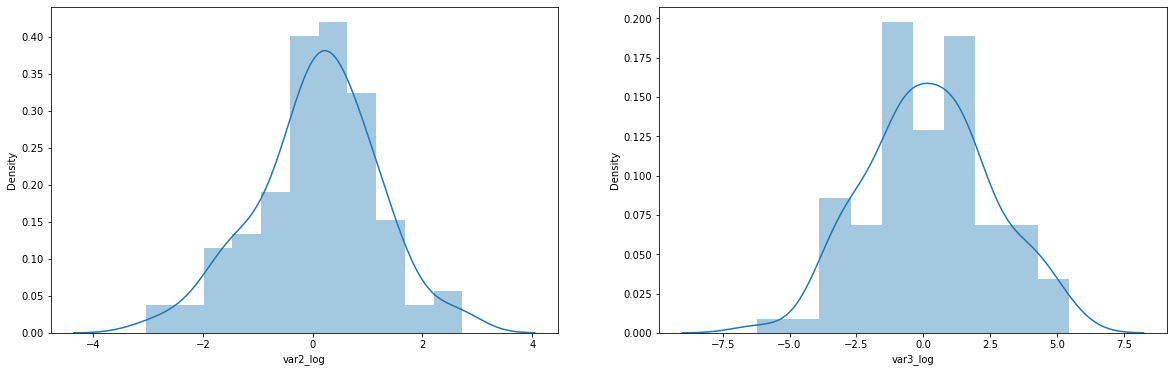

In [14]:
# Apply log transformation to var2
data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Display
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1); sns.distplot(data['var2_log'])
plt.subplot(1, 2, 2); sns.distplot(data['var3_log'])
plt.show()

## 3. Centering and scaling variables
In this lesson we will learn the importance of centering and scaling the variables.
#### Identifying an issue
The first thing to do is diagnostics, to identify if there is actually an issue.

We will analyze key statistics of the dataset and compare the mean and standard deviation of each variable. We will also use the `describe() function` on our RFM datamart. 

In [15]:
data_mart.describe()[['Recency', 'Frequency', 'Monetary_Value']]

,Recency,Frequency,Monetary_Value
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


There we go - we can immediately see that each of our three variables has both a different average value and a different standard deviation. In the next step, we will deal with centering the data to make the average values match.

#### Centering variables with different means
Given that `k-means` **works well on variables with the same mean values**, we will have to center them. 

- Centering variables is a simple procedure which is done by calculating an average for each variable and then subtracting it from each observation. In python this is relatively straightforward and we can do it uniformly for all variables at once. 
- We will store our data to `datamart_centered`, and then review key statistics of it. 

We have rounded the numbers since after subtraction the output of the `describe() function` will have a scientific expression given that the values have many decimals. 

In [16]:
datamart_rfm = data_mart[['Recency', 'Frequency', 'Monetary_Value']]
datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,Monetary_Value
count,3643.00,3643.00,3643.00
mean,0.00,-0.00,0.00
std,94.45,43.75,1347.44
min,-89.44,-17.71,-370.04
25%,-71.44,-14.71,-311.99
50%,-39.44,-9.71,-234.32
75%,48.56,2.29,-36.34
max,274.56,1478.29,47689.66


As you will see, the average values are now very close to zero for all three variables.

#### Scaling variables with different variance
Now, we will do the same with the different variance values for each variable as we've seen before. K-means works better on variables with not only the same average values, but with the same variance. 
- The mechanism to scale the variables to the same variance is as simple as centering - we just have to divide each observation by the standard deviation of each variable.
- We use the standard deviation function `std()` on the `datamart` and then divide our original dataset by this value. As previously, we can do it all at once for all variables. We store the result as the `datamart_scaled` dataframe. Now we can review if this did the job. 

In [17]:
datamart_scaled = datamart_rfm / datamart_rfm.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,Monetary_Value
count,3643.00,3643.00,3643.00
mean,0.96,0.43,0.28
std,1.00,1.00,1.00
min,0.01,0.02,0.00
25%,0.20,0.09,0.04
50%,0.54,0.21,0.10
75%,1.47,0.48,0.25
max,3.86,34.21,35.67


The results are clear: the standard deviation is comparable across each of the transformed variables.

#### Combining centering and scaling
Now, the last step is to combine the two. There are actually several options to normalize variables. One is the options we reviewed previously - manually subtract the mean and divide by standard deviation. 
- Another alternative is to use a built-in function from the scikit-learn library called `StandardScaler()`. It does return a numpy.ndarray instead of pandas dataframe which is - in our case - an advantage as k-means will run faster on this type of output. It works pretty simply. 
- You just `import StandardScaler()` from `sklearn.preprocessing`, and initialize it as `scaler`. 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- Then run a `fit() function` on the data, and create a NumPy array datamart_normalized by applying a transform function on the original data. 

In [19]:
scaler.fit(datamart_rfm)

StandardScaler()

Let's calculate the mean and standard deviation for the transformed data. 

In [20]:
datamart_norm = scaler.transform(datamart_rfm)
print('mean', datamart_norm.mean(axis=0).round(2))
print('std', datamart_norm.std(axis=0).round(2))

mean [-0. -0.  0.]
std [1. 1. 1.]


Great! We have reached the same results with this library as with the manual transformations.

Although results are the same, using the `StandardScaler() method` from `scikit-learn` is beneficial when building machine learning pipelines.

### 3.2. PRACTICES
#### Exercise 3.2.1. Center and scale manually
We've loaded the same dataset named data. Now your goal will be to center and scale them manually.

Libraries pandas, numpy, seaborn and `matplotlib.pyplot` have been loaded as `pd`, `np`, `sns` and `plt` respectively. 
#### SOLUTION.

In [21]:
data = data[['var1', 'var2', 'var3']]

# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

         var1    var2    var3
count  100.00  100.00  100.00
mean     0.00   -0.00    0.00
std      1.00    1.00    1.00
min     -1.66   -0.73   -0.36
25%     -0.88   -0.51   -0.36
50%     -0.02   -0.29   -0.33
75%      0.96    0.11   -0.20
max      1.60    5.18    6.26


#### Exercise 3.2.2. Center and scale with StandardScaler()
We've loaded the same dataset named data. Now your goal will be to center and scale them with StandardScaler from sklearn library.

Libraries pandas, numpy, seaborn and matplotlib.pyplot have been loaded as pd, np, sns and plt respectively. We have also imported the StandardScaler.
#### SOLUTION.

In [22]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

         var1    var2    var3
count  100.00  100.00  100.00
mean     0.00    0.00    0.00
std      1.01    1.01    1.01
min     -1.67   -0.73   -0.37
25%     -0.88   -0.51   -0.36
50%     -0.02   -0.29   -0.33
75%      0.97    0.11   -0.20
max      1.60    5.21    6.30


## 4. Sequence of structuring pre-processing steps
In this lesson, I want to focus on the importance of sequence when structuring the pre-processing steps.

#### Why the sequence matters?
- First, we have to discuss why the sequence of the transformations matters at all. Since the log transformation only works with **strictly positive data**, we have to run it first as our customer behavior or purchasing values will almost always be positive. 
- Additionally, the **centering and scaling process forces** each variable to have a mean of 0 and a standard deviation of 1. This almost always introduces **negative values** unless all observations are equal to the same value.

#### Sequence
Therefore, the sequence of the pre-processing pipelines should be structured in a specific order. 
- First, we have to **unskew** the data with a log transformation. 
- Only then we **standardize** the variable to the same average values, and 
- **Scale** them to the **same standard deviation**. 
- Finally, we store the results as a **separate object** than the original dataset. 

This is a critical moment as after we're done with clustering, we will come back to the original values to calculate statistics for each of the clusters based on raw values.

#### Coding the sequence
- First we run the log transformation by applying the `log() function` from the NumPy library. We store it as datamart_log to separate it from the raw values.

In [23]:
datamart_log = np.log(datamart_rfm)
datamart_log.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12747,1.098612,3.218876,6.855093
12748,0.000000,6.788972,8.860238
12749,1.386294,3.610918,6.701284
12820,1.386294,2.833213,5.591062
12822,4.262680,2.197225,4.984633


Then we run the centering and scaling by using the `StandardScaler()` from the scikit-learn library.

In [24]:
scaler = StandardScaler()

 Finally, we store the results of the normalized data into a different object called datamart_normalized. This is it! We are now ready to run k-means clustering and identify valuable customer segments.

In [25]:
datamart_normalized = scaler.fit_transform(datamart_log)

### 4.2. PRACTICES
#### Exercise 4.2.1. Visualize RFM distributions
We have loaded the dataset with RFM values you calculated previously as datamart_rfm. You will now explore their distributions.
#### SOLUTION.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

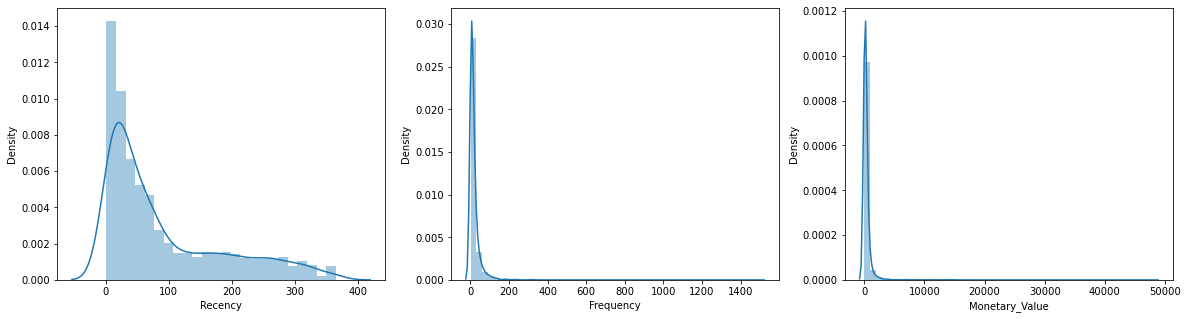

In [26]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1); sns.distplot(datamart_rfm['Recency'])
plt.subplot(1, 3, 2); sns.distplot(datamart_rfm['Frequency'])
plt.subplot(1, 3, 3); sns.distplot(datamart_rfm['Monetary_Value'])
plt.show()

#### Exercise 4.2.2. Pre-process RFM data
We have loaded the dataset with RFM values you calculated previously as datamart_rfm. Since the variables are skewed and are on different scales, you will now un-skew and normalize them.
#### SOLUTION.

In [27]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data = datamart_normalized,
                                   index = datamart_rfm.index, 
                                   columns = datamart_rfm.columns)
datamart_normalized.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12747,-2.002202,0.865157,1.464940
12748,-2.814518,3.815272,2.994692
12749,-1.789490,1.189117,1.347598
12820,-1.789490,0.546468,0.500595
12822,0.337315,0.020925,0.037943


#### Exercise 4.2.3. Visualize the normalized variables
Great work! Now you will plot the normalized and unskewed variables to see the difference in the distribution as well as the range of the values. The datamart_normalized dataset from the previous exercise is loaded.
#### SOLUTION.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

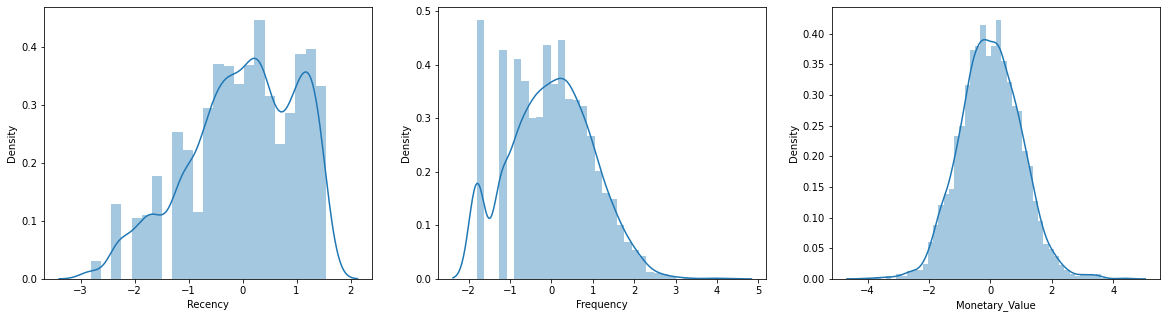

In [28]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1); sns.distplot(datamart_normalized['Recency'])
plt.subplot(1, 3, 2); sns.distplot(datamart_normalized['Frequency'])
plt.subplot(1, 3, 3); sns.distplot(datamart_normalized['Monetary_Value'])
plt.show()